In [2]:
#Tutorial：https://www.bilibili.com/video/BV1Ut411n78Z

# jupyter notebook 宽屏显示
from IPython.core.display import display,HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use({'figure.figsize':(10,8)})

In [5]:
import seaborn as sns

sns.set_style("whitegrid")

df=sns.load_dataset("iris")

# seaborn设置主题、调色板：https://www.cnblogs.com/gczr/p/6767175.html

In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# PCA Visualization Tool: projector.tensorflow.org

#### 直方图

<AxesSubplot:ylabel='Frequency'>

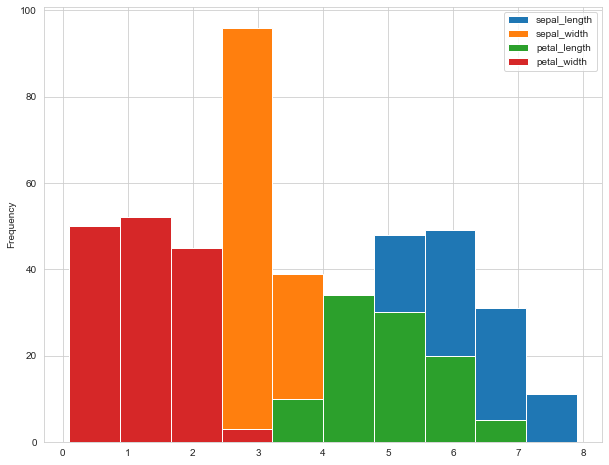

In [11]:
df.plot(kind='hist')

#### 分箱图

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

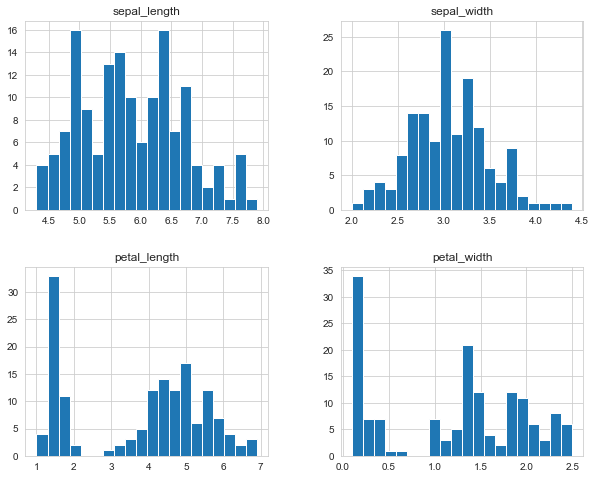

In [12]:
df.hist(bins=20)

In [13]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 面积堆积图

<AxesSubplot:>

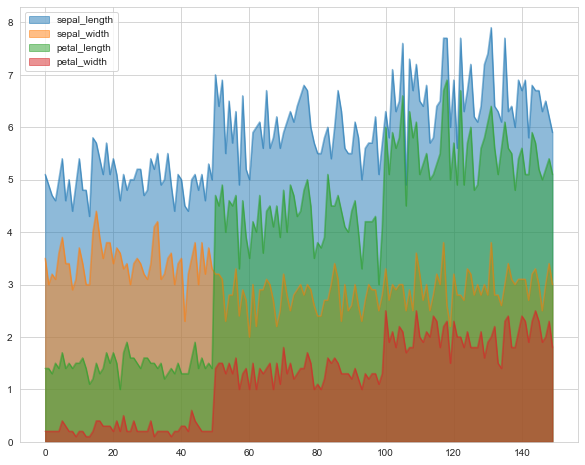

In [14]:
df.plot.area(stacked=False)
#按数据顺序显示，明显有三类

#### Feature Correlation

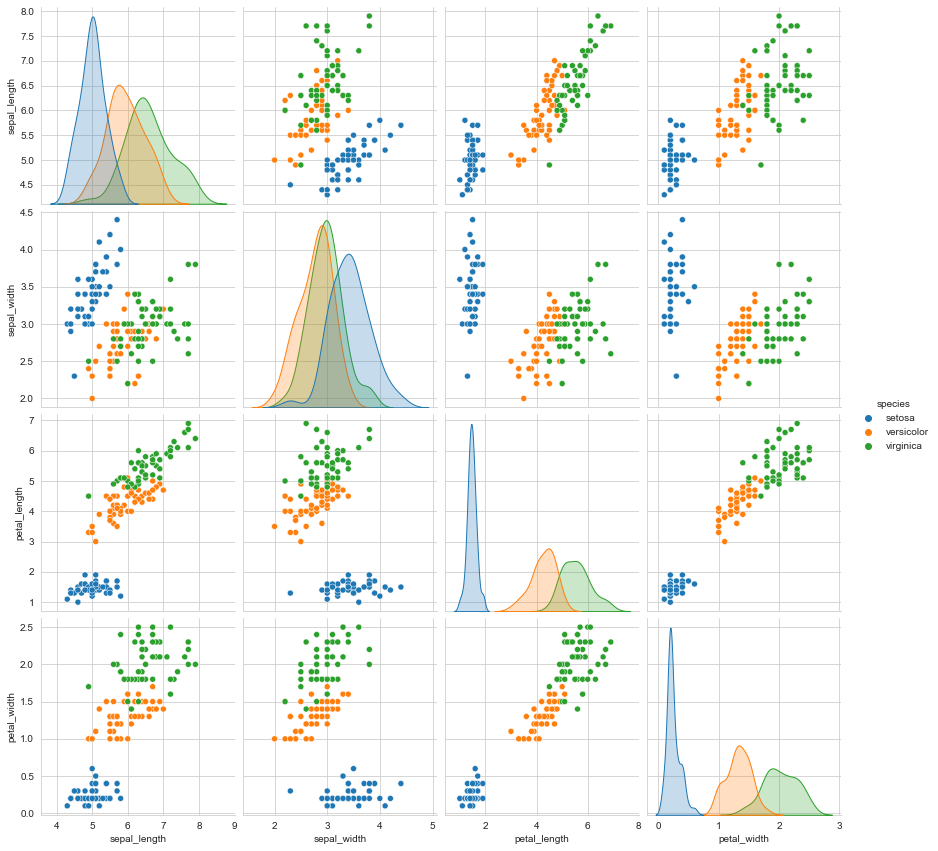

In [15]:
sns.pairplot(df,hue="species",height=3)
# http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

#### KDE 核密度图
- 直方图显示数据分布虽然简单易懂，但存在以下问题：
        - 密度函数不平滑，区间越大，锯齿现象越严重
        - 只能显示两个变量的关系，无法显示高维数据
        - 子区间宽度对最后概率密度影响很大
        
- 核函数就是给空间的每个离散点都套上一个连续分布，应用最多的是高斯核函数(Gasussian Kernel),也就是标准正态分布。所谓核密度估计就是把所有离散点的核函数加起来，得到整体的概率密度分布。核密度估计在很多机器学习算法中都有应用，比如支持向量机、K近邻、K平均等

<AxesSubplot:ylabel='Density'>

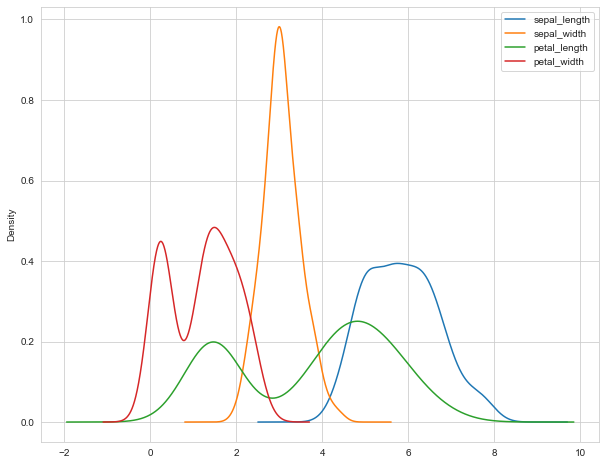

In [16]:
df.plot(kind='kde')

C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\distributions.py:1678

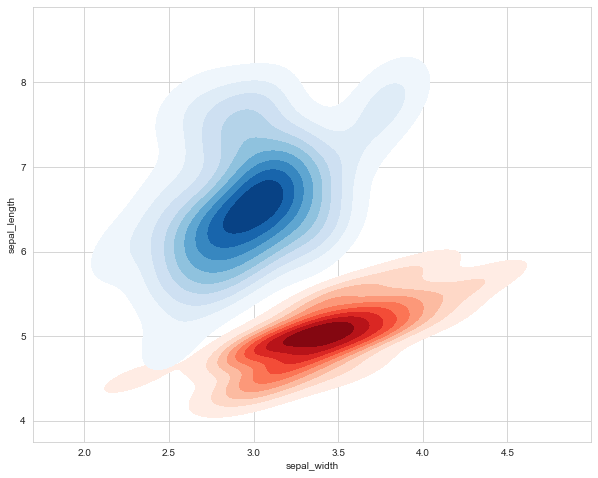

In [19]:
# 分别提取三个品类的花
setosa = df.loc[df.species == "setosa"]
versicolor = df.loc[df.species == "versicolor"]
virginica = df.loc[df.species == "virginica"]

ax=sns.kdeplot(setosa.sepal_width,setosa.sepal_length,cmap="Reds",shade=True,shade_lowest=False)
ax=sns.kdeplot(virginica.sepal_width,virginica.sepal_length,cmap="Blues",shade=True,shade_lowest=False)
#ax=sns.kdeplot(versicolor.sepal_width,versicolor.sepal_length,cmap="Greens",shade=True,shade_lowest=False)

#### 热力图

In [20]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

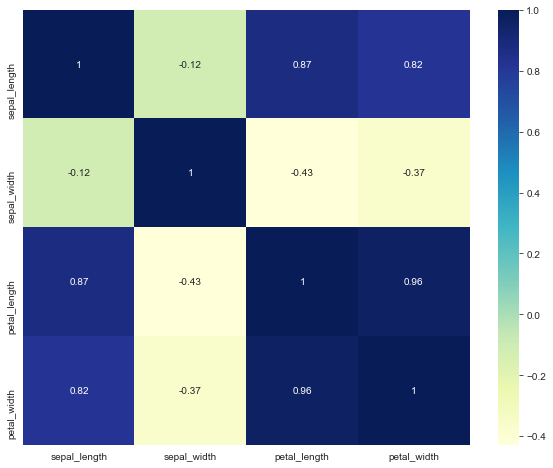

In [22]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
# 颜色越深越相关
# 花萼长度和花萼宽度没有相关关系，而花瓣长度和花瓣宽度之间的相关关系却很明显

In [25]:
# Look at a heat map of data that has more features
flight=sns.load_dataset("flights")
flight=flight.pivot("month","year","passengers")
flight.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

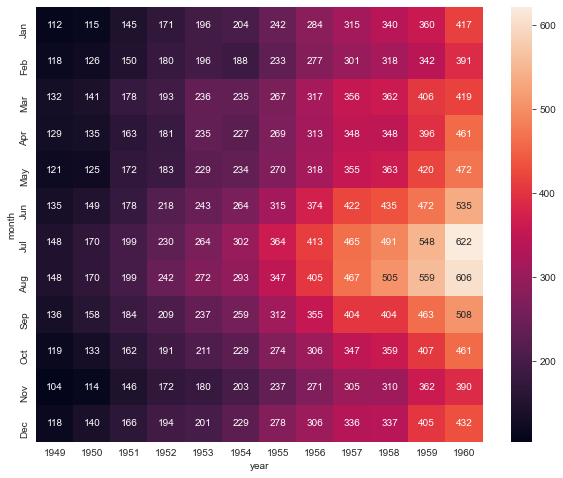

In [26]:
sns.heatmap(flight,annot=True,fmt='d')
#数字越大，乘客越多

#### 箱型图

<AxesSubplot:>

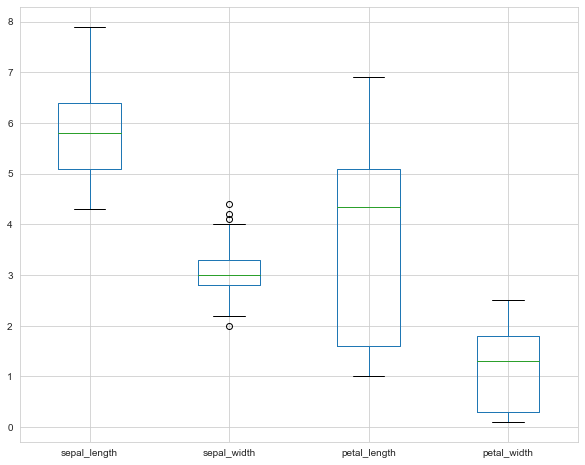

In [27]:
df.plot(kind='box')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

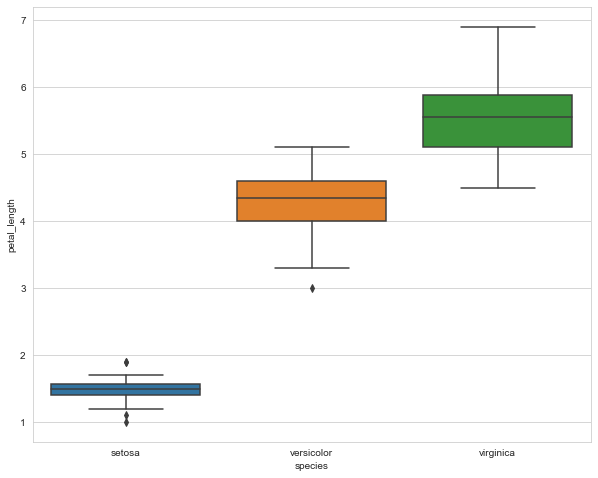

In [28]:
sns.boxplot(y=df['petal_length'],x=df['species'])

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

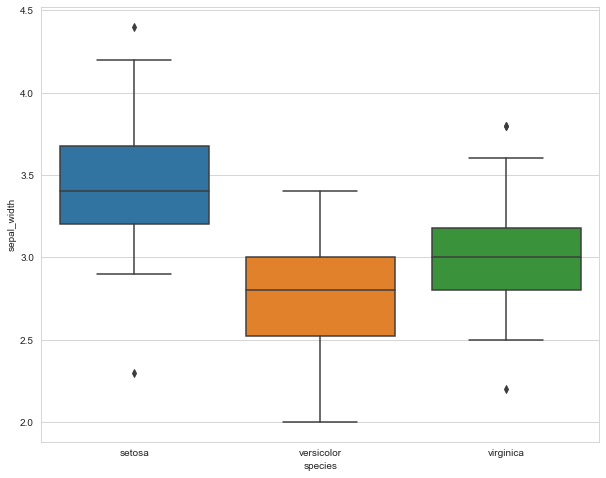

In [30]:
sns.boxplot(data=df,x='species',y='sepal_width')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

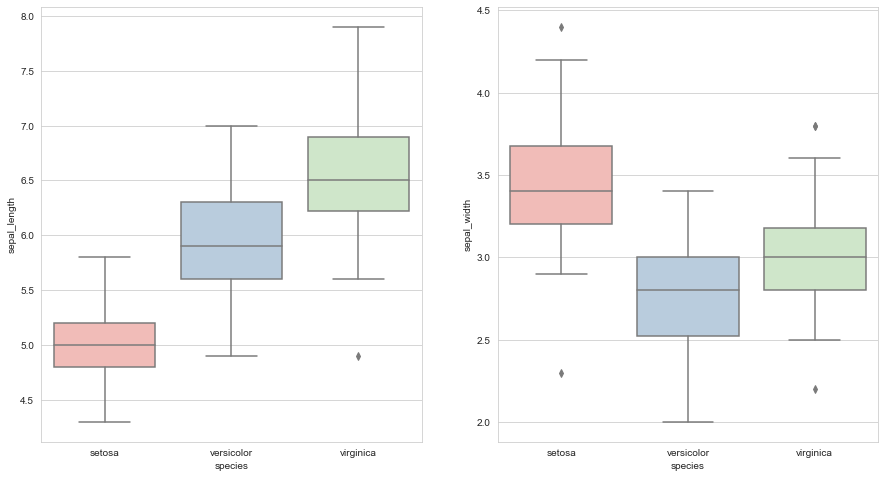

In [32]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x="species",y="sepal_length",data=df,palette="Pastel1",ax=axes[0])
sns.boxplot(x="species",y="sepal_width",data=df,palette="Pastel1",ax=axes[1])

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

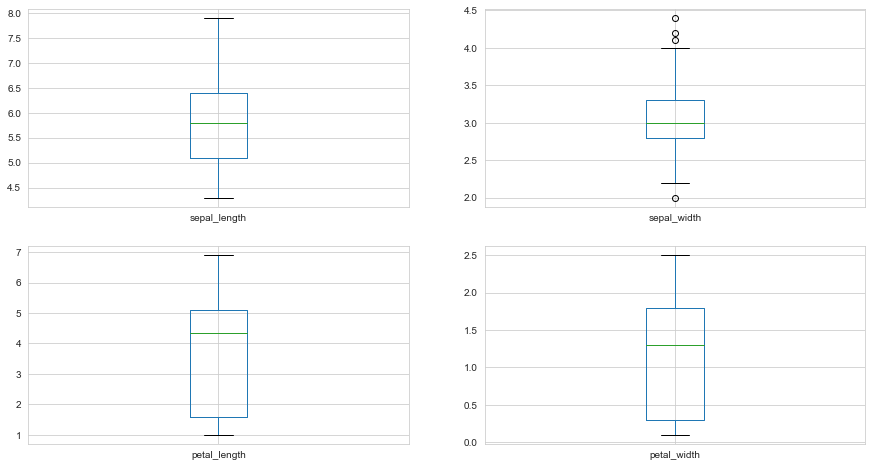

In [33]:
df.plot(kind="box",subplots=True,layout=(2,2),sharex=False,figsize=(15,8))

# 正态分布远离3sigma则被认为是异常值
# 普通分布大于Q+1.5QR或小于Q-1.5QR则被认为是异常值

#### 小提琴图

In [34]:
plt.style.use({'figure.figsize':(8,8)})

<AxesSubplot:ylabel='sepal_length'>

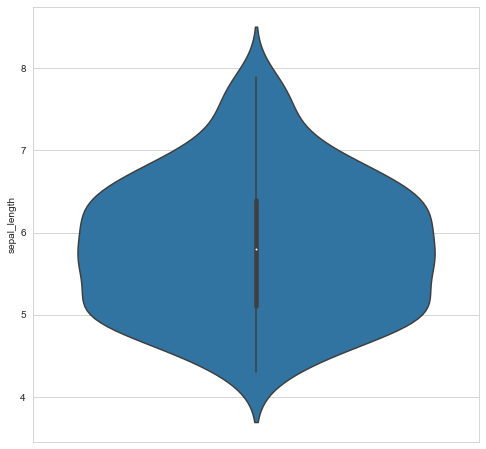

In [35]:
sns.violinplot(y=df['sepal_length'])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

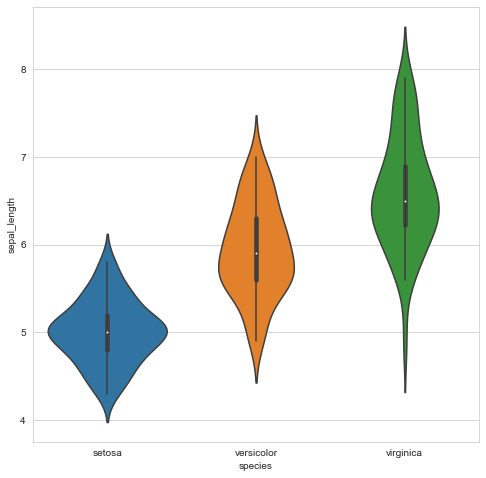

In [36]:
sns.violinplot(x=df['species'],y=df['sepal_length'])

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

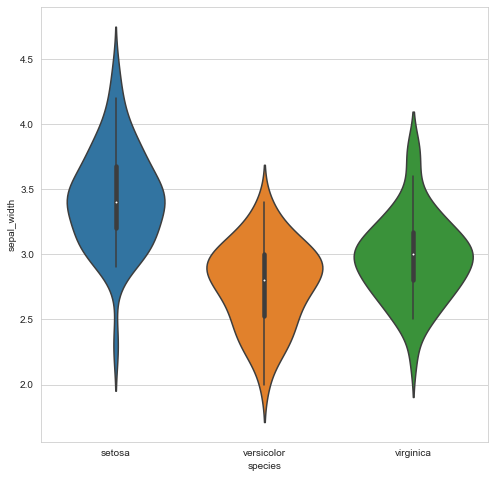

In [37]:
sns.violinplot(x=df['species'],y=df['sepal_width'])

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

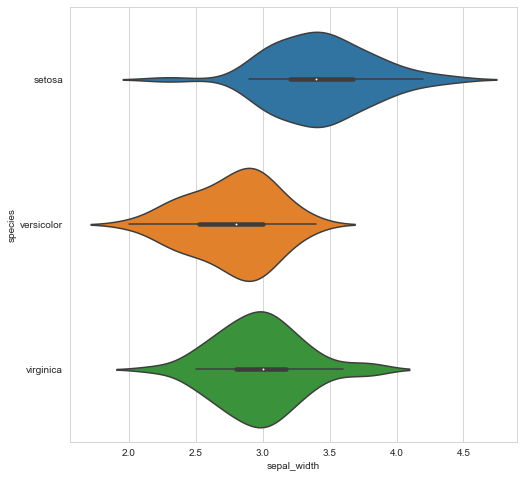

In [38]:
sns.violinplot(y=df['species'],x=df['sepal_width'])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

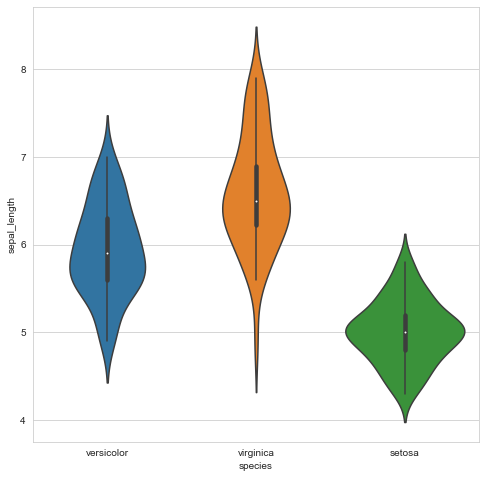

In [40]:
sns.violinplot(x='species',y='sepal_length',data=df,order=['versicolor','virginica','setosa'])

<AxesSubplot:>

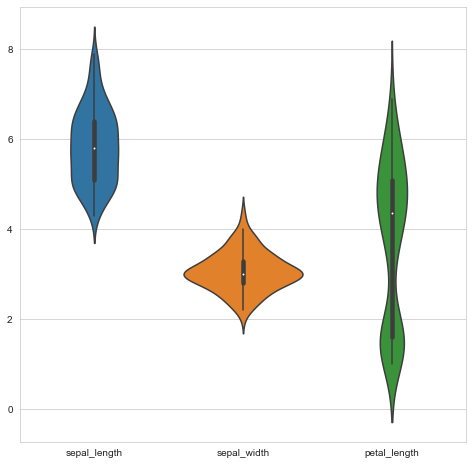

In [41]:
sns.violinplot(data=df.iloc[:,0:3])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

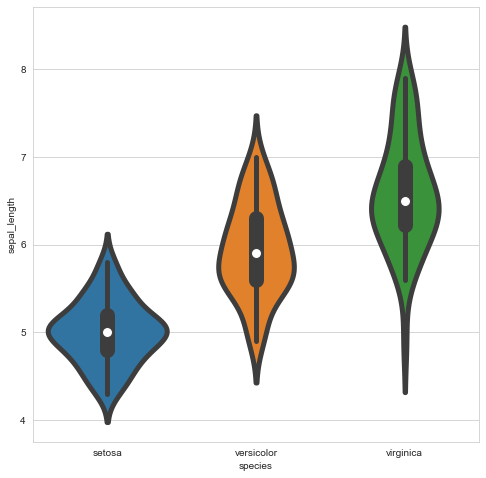

In [42]:
sns.violinplot(x=df['species'],y=df['sepal_length'],linewidth=5)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

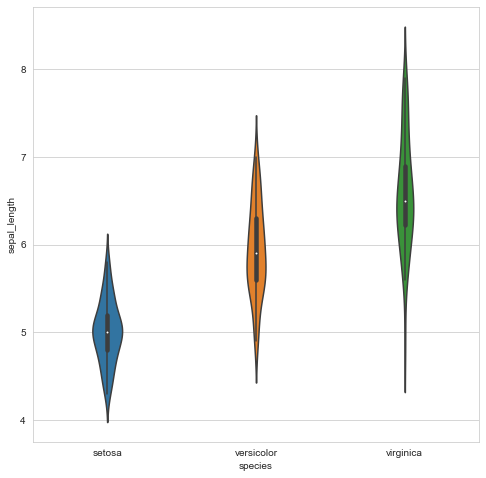

In [43]:
sns.violinplot(x=df['species'],y=df['sepal_length'],width=0.2)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

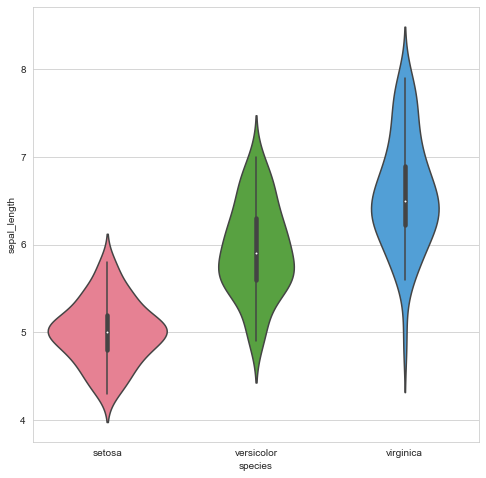

In [46]:
sns.violinplot(x=df['species'],y=df['sepal_length'],palette='husl') 
# palette = "Blues" 深浅不一蓝色
#也可以color="skyblue" 得到单色

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

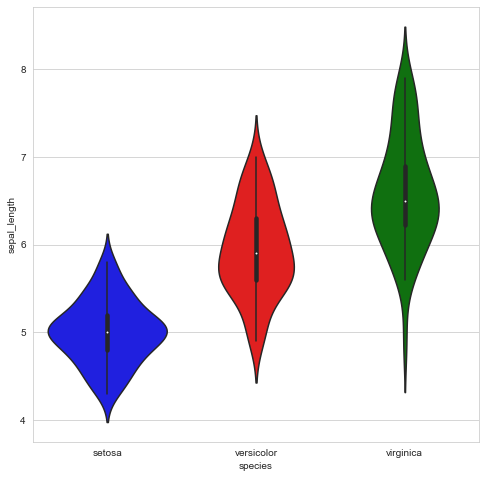

In [47]:
my_pal = {'versicolor':'r','virginica':'g','setosa':'b'}
sns.violinplot(x=df['species'],y=df['sepal_length'],palette=my_pal) 

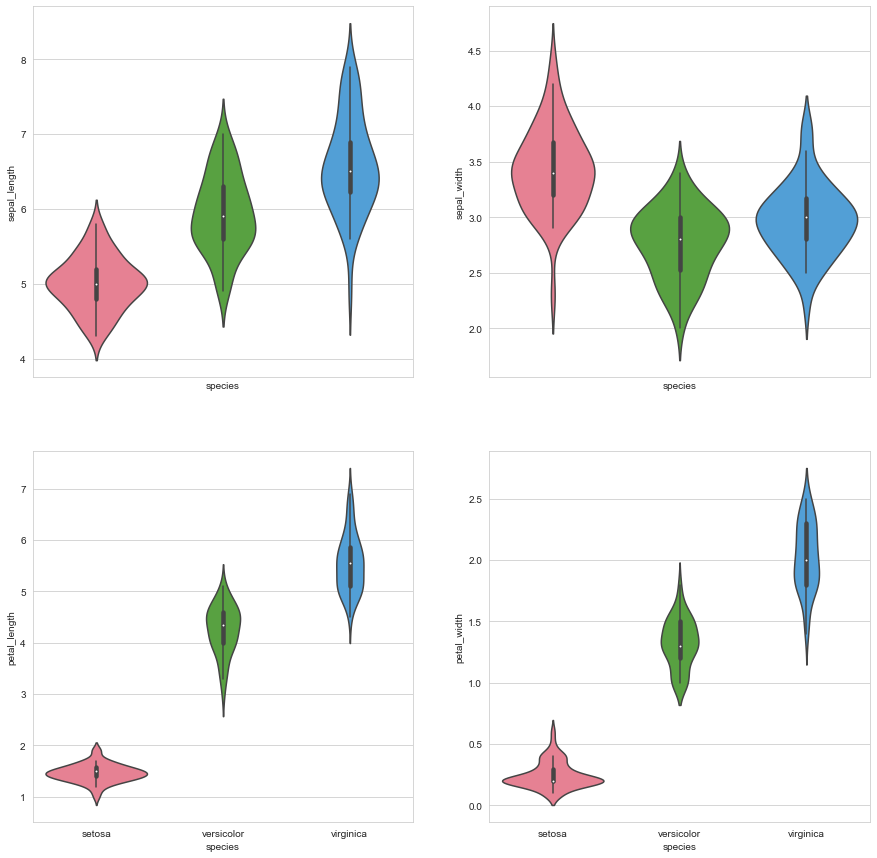

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

f,axes=plt.subplots(2,2,figsize=(15,15),sharex=True)

sns.violinplot(x='species',y='sepal_length',data=df,palette="husl",ax=axes[0,0])
sns.violinplot(x='species',y='sepal_width',data=df,palette="husl",ax=axes[0,1])
sns.violinplot(x='species',y='petal_length',data=df,palette="husl",ax=axes[1,0])
sns.violinplot(x='species',y='petal_width',data=df,palette="husl",ax=axes[1,1])
plt.show()

In [53]:
# 如果特征中有仅包含两个值的定类数据（如性别、是否吸烟），那可以让小提琴图各显示一半。
# 以下是一个tips dataset，显示了不同客人在不同时间给小费的情况
df_test = sns.load_dataset('tips')
df_test.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

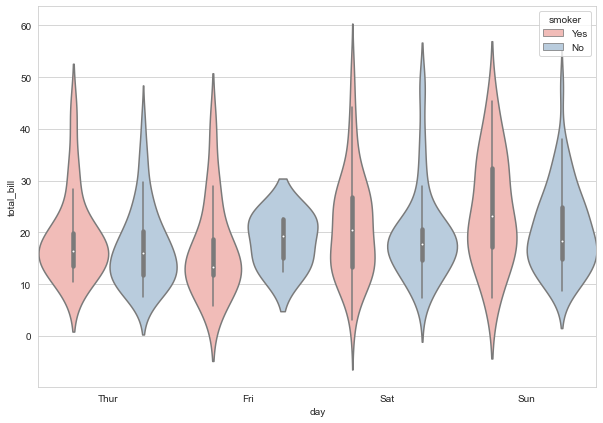

In [54]:
# 小提琴图，按是否抽烟分组
f,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='day',y='total_bill',hue='smoker',data=df_test,palette='Pastel1',width=1)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

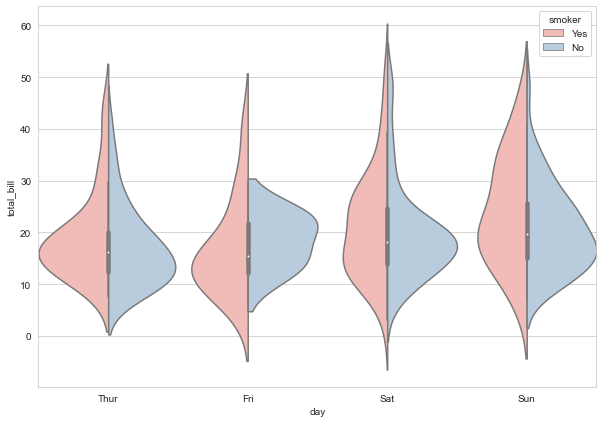

In [56]:
# 各显示一半
f,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='day',y='total_bill',hue='smoker',data=df_test,split=True,palette='Pastel1',width=1)

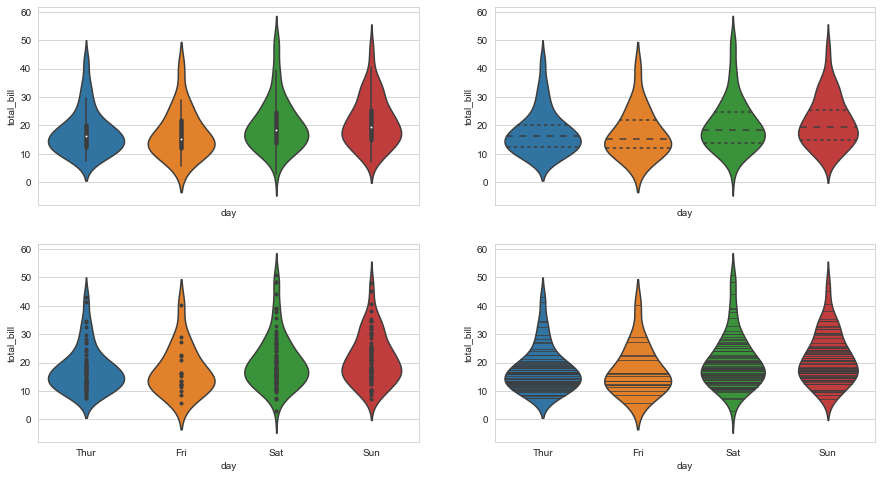

In [58]:
f,axes=plt.subplots(2,2,figsize=(15,8),sharex=True)

sns.violinplot(x='day',y='total_bill',data=df_test,inner='box',ax=axes[0,0])
sns.violinplot(x='day',y='total_bill',data=df_test,inner='quartil',ax=axes[0,1])
sns.violinplot(x='day',y='total_bill',data=df_test,inner='point',ax=axes[1,0])
sns.violinplot(x='day',y='total_bill',data=df_test,inner='stick',ax=axes[1,1])
plt.show()

#### 平行坐标图

In [59]:
plt.style.use({'figure.figsize':(15,10)})

<AxesSubplot:>

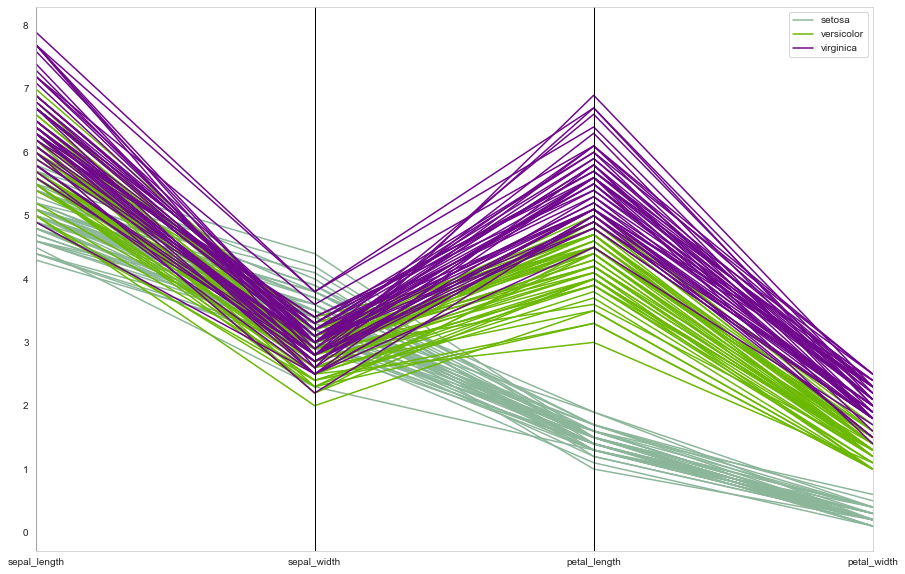

In [60]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df,'species')
# 高维数据可视化聚类常常用到的图

#### 六边形蜂窝图

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

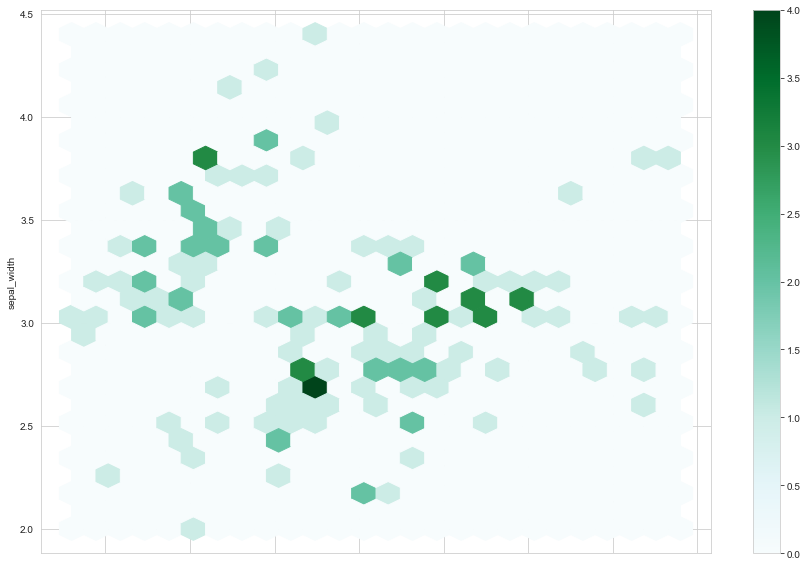

In [61]:
df.plot.hexbin(x='sepal_length',y='sepal_width',gridsize=25)
# 城市大数据里常用
# 类似热力图

#### 雷达图（径向坐标可视化）
- Radviz雷达图是一种可视化多维数据的方式
- 本质是将多维特征降维压缩到二维，每个数据压缩为一个点。它基于基本的弹簧压力最小化算法

<AxesSubplot:>

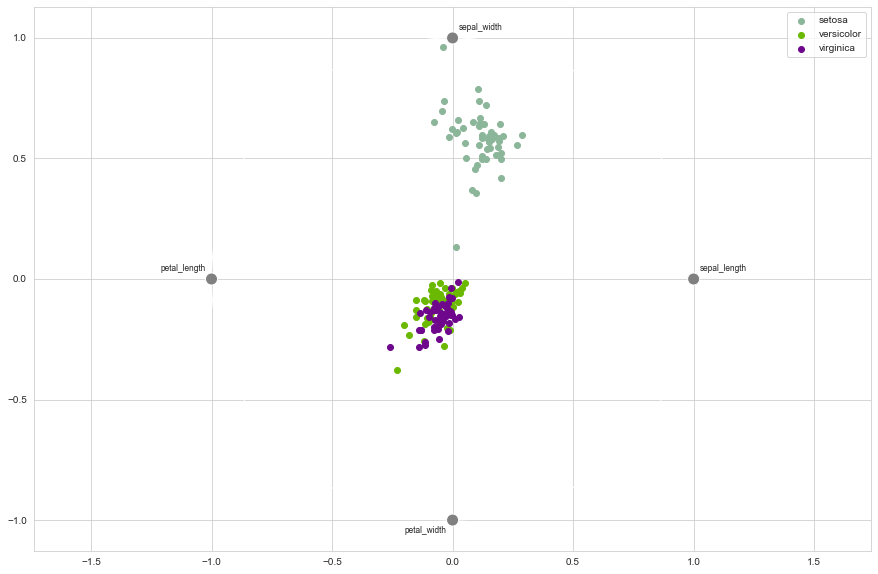

In [62]:
from pandas.plotting import radviz
radviz(df,'species')

#### 安德鲁斯曲线
- 将每个样本的属性值转化为傅里叶序列的系数来绘制曲线

<AxesSubplot:>

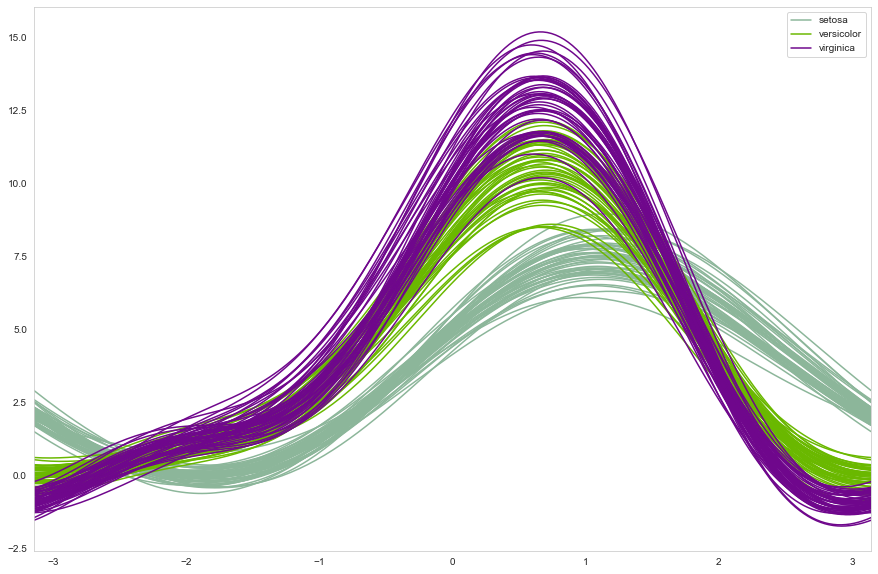

In [63]:
from pandas.plotting import andrews_curves
andrews_curves(df,'species')
# 把思维向量映射成一根线

# 傅里叶变换 https://wow.techbrood.com/fiddle/16534

